In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
# Path to the zip file
zip_file = r'C:\Users\sivan\Downloads\intel_image_net.zip'

# Destination directory where you want to unzip the files
unzip_dir = r'C:\Users\sivan\Downloads\intel_image_net'

dataset_dir = 'C:/Users/sivan/Downloads/intel_image_net/'

# Define paths to train and test directories
train_dir = os.path.join(dataset_dir, 'seg_train/seg_train')
test_dir = os.path.join(dataset_dir, 'seg_test/seg_test')



In [6]:
# Define image size and batch size
img_size = (150, 150)
batch_size = 32

# Image data generator for data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # Split for validation

test_datagen = ImageDataGenerator(rescale=1./255)

# Train set
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')

# Validation set
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                         target_size=img_size,
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation')

# Test set
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a CNN model
model = Sequential()

# First Convolution + Pooling layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolution + Pooling layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolution + Pooling layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into a Dense layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Add dropout to reduce overfitting
model.add(Dropout(0.5))

# Output layer (assuming 6 classes, adjust if necessary)
model.add(Dense(6, activation='softmax'))

# Print the model summary
model.summary()


c:\Users\sivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
steps_per_epoch = len(train_generator)  # Number of batches per epoch
validation_steps = len(validation_generator)  # Number of batches for validation


In [12]:
# Assuming you have already defined 'train_generator' and 'validation_generator'
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Train your model
history = model.fit(
    train_generator,               # Training data
    steps_per_epoch=steps_per_epoch,  # Number of steps per epoch
    validation_data=validation_generator,  # Validation data
    validation_steps=validation_steps,  # Validation steps
    epochs=25,                     # Number of epochs
    verbose=1                      # Show training progress
)


Epoch 1/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 179s 501ms/step - accuracy: 0.4899 - loss: 1.2852 - val_accuracy: 0.6900 - val_loss: 0.8355
Epoch 2/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.5625 - loss: 1.2247 - val_accuracy: 0.8000 - val_loss: 0.7123
Epoch 3/25


c:\Users\sivan\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


350/350 ━━━━━━━━━━━━━━━━━━━━ 165s 467ms/step - accuracy: 0.6786 - loss: 0.8573 - val_accuracy: 0.7425 - val_loss: 0.7124
Epoch 4/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 151us/step - accuracy: 0.7188 - loss: 0.7397 - val_accuracy: 0.7000 - val_loss: 0.7622
Epoch 5/25
177/350 ━━━━━━━━━━━━━━━━━━━━ 1:46 616ms/step - accuracy: 0.7379 - loss: 0.7349

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.1708 - loss: 1.8363
Test Loss: 1.7963461875915527
Test Accuracy: 0.14900000393390656


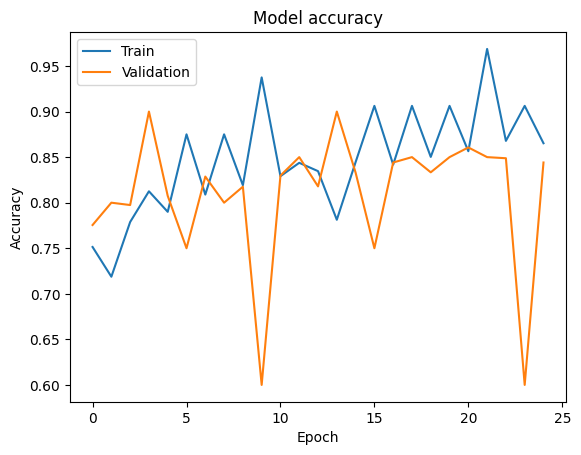

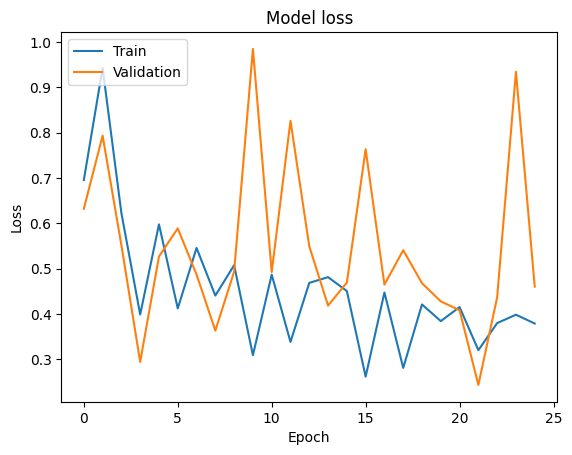

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [14]:
import numpy as np

# Predict on test data
predictions = model.predict(test_generator, steps=len(test_generator))

# Get predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Get class labels
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())

# Convert predictions to class labels
predicted_labels = [labels[k] for k in predicted_class_indices]


94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step


In [16]:
# Make predictions on the test data
predictions = model.predict(test_generator, steps=len(test_generator))

# Get the predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Get class labels
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}  # Invert the dictionary

# Map predicted indices to labels
predicted_labels = [labels[i] for i in predicted_class_indices]

# Print predicted labels
for i, label in enumerate(predicted_labels):
    print(f"Image {i}: Predicted class - {label}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step
Image 0: Predicted class - buildings
Image 1: Predicted class - buildings
Image 2: Predicted class - buildings
Image 3: Predicted class - buildings
Image 4: Predicted class - buildings
Image 5: Predicted class - buildings
Image 6: Predicted class - buildings
Image 7: Predicted class - street
Image 8: Predicted class - buildings
Image 9: Predicted class - buildings
Image 10: Predicted class - buildings
Image 11: Predicted class - buildings
Image 12: Predicted class - buildings
Image 13: Predicted class - buildings
Image 14: Predicted class - buildings
Image 15: Predicted class - buildings
Image 16: Predicted class - buildings
Image 17: Predicted class - buildings
Image 18: Predicted class - buildings
Image 19: Predicted class - buildings
Image 20: Predicted class - street
Image 21: Predicted class - buildings
Image 22: Predicted class - buildings
Image 23: Predicted class - buildings
Image 24: Predicted class - buildings
Image 25: Predicted class 

In [17]:
# Assuming you have true labels for the test set
true_labels = test_generator.classes  # Actual labels from the test generator
true_labels = [labels[i] for i in true_labels]  # Map to class names

# Evaluate accuracy
accuracy = np.sum(np.array(predicted_labels) == np.array(true_labels)) / len(true_labels)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


Accuracy on test set: 84.27%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted class: sea
Confidence: 96.72%


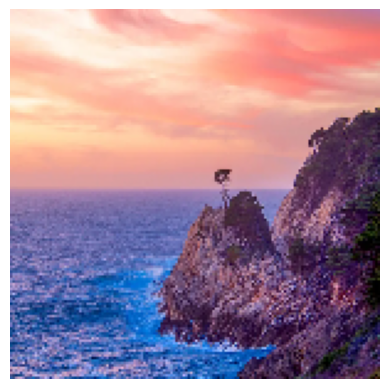

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def predict_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))  # Match this to your model's input size
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions
    img_array /= 255.0  # Normalize pixel values

    # Make the prediction
    predictions = model.predict(img_array)
    
    # Get the predicted class index
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    
    # Map class index to class label
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    predicted_label = class_labels[predicted_class_idx]
    
    # Print the result
    print(f"Predicted class: {predicted_label}")
    print(f"Confidence: {predictions[0][predicted_class_idx] * 100:.2f}%")

    # Optionally, display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Provide the path to your test image
test_image_path = 'C:\\Users\\sivan\\Downloads\\sea.webp'  # Change this to your image path
predict_image(test_image_path)


In [5]:
# Save the trained model
model.save('my_model.h5')


NameError: name 'model' is not defined

In [2]:
model.save('C:/Users/sivan/OneDrive/Desktop/csp/my_model.h5')  # Adjust this path as necessary



NameError: name 'model' is not defined